# **Exercise 3: Predicting Wine Quality**  

## **Context**  
The **Wine Quality Dataset** available on Kaggle contains data on **various wines**, including **physicochemical properties** (such as acidity, alcohol content, and pH) and **sensory quality ratings** from experts.  

Since the wines are **graded with a quality score (ranging from 3 to 9)**, this dataset is ideal for a **multiclass classification problem**.  

## **Main Question**  
Can we accurately predict the **quality category** of wines based on their **physicochemical properties**?  

## **Objective**  
The goal is to build a **classification model** to determine the **wine quality category** based on the given features. This requires:  
- **Handling multiple classes** using a suitable algorithm.  
- **Evaluating model performance** for effective classification.  


## **Step 1: Import Required Libraries**
We first import necessary libraries for:
- Data handling (`pandas`, `numpy`)
- Data visualization (`seaborn`, `matplotlib`)
- Machine learning (`sklearn` for preprocessing, model training, and evaluation)




In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




## **Step 2: Load and Inspect the Dataset**
- Load the dataset from CSV.
- Display the first few rows to understand its structure.
- Get dataset summary (`.info()`) to check for missing values and data types.


In [26]:
# Load the dataset
df = pd.read_csv("./WineQT.csv")  # Update path if necessary

# Display first 5 rows
print("Dataset Preview:")
print(df.head())

# Display dataset information
df.info()


Dataset Preview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8       

## **Step 3: Exploratory Data Analysis (EDA)**
- Check the distribution of **wine quality ratings**.
- Visualize relationships between **physicochemical features** and quality.
- Detect **outliers** and **correlations**.


C:\Users\marya\AppData\Local\Temp\ipykernel_20784\74232086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['quality'], palette="viridis")


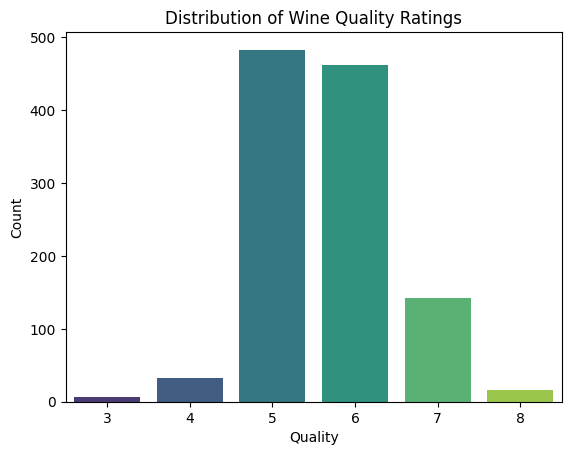

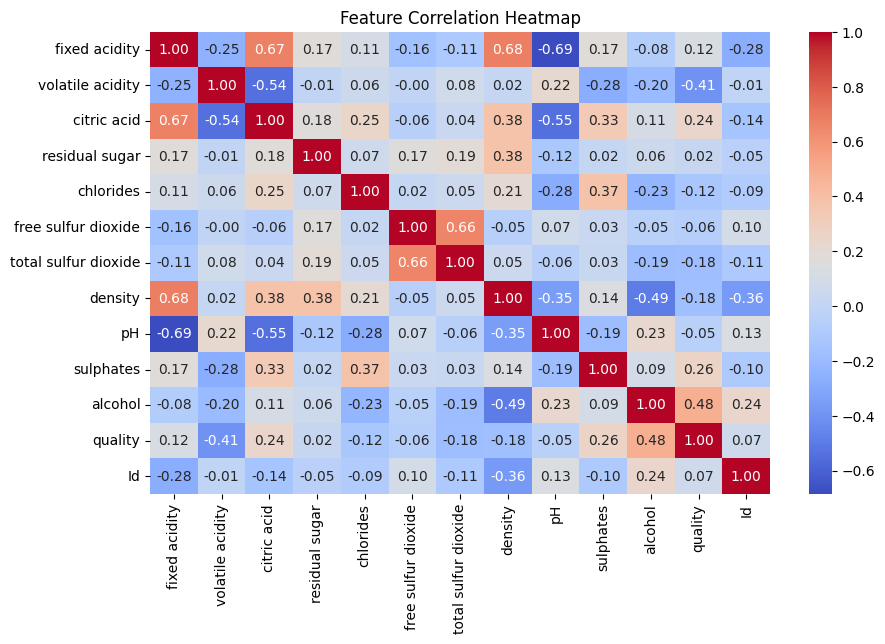

In [27]:


# Plot distribution of wine quality ratings
sns.countplot(x=df['quality'], palette="viridis")
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()




## **Step 4: Data Preprocessing**
- **Drop unnecessary columns** (`Id`).
- **Check for missing values**.
- **Standardize numerical features** for better model performance.


In [28]:
# Drop the 'Id' column as it's irrelevant for prediction
df.drop(columns=['Id'], inplace=True)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Standardize numerical features
scaler = StandardScaler()
numerical_features = df.drop(columns=['quality'])  # Exclude target variable
df[numerical_features.columns] = scaler.fit_transform(df[numerical_features.columns])


Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## **Step 5: Encode the Target Variable**
- The `quality` column is an ordinal category (integer 3-8).
- We can either:
  - Keep it as a **multiclass classification** task.
  - Convert it into three categories (`Low`, `Medium`, `High`).


In [29]:
# Optional: Group quality into categories (Low, Medium, High)
from sklearn.preprocessing import LabelEncoder

# Convert quality into categorical labels
df['quality_label'] = pd.cut(df['quality'], bins=[2, 4, 6, 8], labels=['Low', 'Medium', 'High'])

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
df['quality_label'] = label_encoder.fit_transform(df['quality_label'])

# Display encoded labels
print(df[['quality', 'quality_label']].head())




   quality  quality_label
0        5              2
1        5              2
2        5              2
3        6              2
4        5              2


## **Step 6: Split Data into Training & Testing Sets**
- Divide dataset into **features (X)** and **target (y)**.
- Split into **80% training** and **20% testing** sets.


In [30]:
# Define X (features) and y (target)
X = df.drop(columns=['quality'])  # Features
y = df['quality']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (914, 12)
Testing set size: (229, 12)


## **Step 7: Train a Classification Model**
- Use **Random Forest Classifier** to predict wine quality.
- Fit the model on the training dataset.


In [31]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **Step 8: Model Evaluation**
- **Predict wine quality** on the test dataset.
- **Measure accuracy, confusion matrix, and classification report**.


Accuracy: 0.8209606986899564
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.88      1.00      0.93         7
           5       0.78      0.87      0.82        97
           6       0.84      0.74      0.79        92
           7       0.91      1.00      0.95        29
           8       0.00      0.00      0.00         3

    accuracy                           0.82       229
   macro avg       0.57      0.60      0.58       229
weighted avg       0.81      0.82      0.81       229



c:\Users\marya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

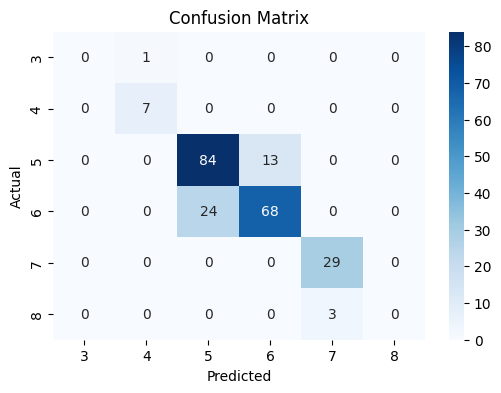

In [32]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=np.sort(y.unique()), yticklabels=np.sort(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Step 9: Interpretation of Model Results

### **1️⃣ Model Accuracy**
- The model achieved an **accuracy of 82.1%**, which suggests a reasonably good performance in predicting wine quality.
- However, accuracy alone does not provide a complete picture of model performance, so we analyze other metrics like precision, recall, and the confusion matrix.

### **2️⃣ Classification Report Analysis**
- **Classes with strong performance:**
  - **Quality 4, 5, 6, and 7** have **high precision and recall**, meaning the model is generally good at predicting these classes.
  - **Quality 7** is predicted with **91% precision** and **100% recall**, indicating that most wines labeled as 7 are correctly identified.
  
- **Classes with poor performance:**
  - **Quality 3 and 8 have 0% recall and precision**, meaning the model struggles with these categories due to their small number of samples.
  - The poor performance for quality 8 suggests that the model fails to distinguish high-end wines.

### **3️⃣ Confusion Matrix Insights**
- **Most misclassifications occur between adjacent quality levels** (e.g., some quality 5 wines are misclassified as 6).
- This is expected because wine quality is subjective and close scores may share similar physicochemical properties.
- The model performs well for **middle-range quality wines (5-7)** but struggles with extreme values (3 and 8).

### **4️⃣ Implications for Wine Production**
- **Reliable prediction for common quality levels**: The model can effectively help wine producers categorize wines with moderate quality (5-7).
- **Needs improvement for rare classes**: More data is required for quality 3 and 8 to improve the model’s performance in these categories.
- **Feature importance**: Future steps could involve feature importance analysis to determine which chemical properties have the most influence on wine quality.

### **5️⃣ Recommendations**
- **Collect more data** for underrepresented wine quality scores (3 and 8).
- **Consider a different classification approach**, such as a weighted loss function, to balance class representation.
- **Analyze feature importance** to determine the most influential factors in wine quality prediction.
